Descripción de la temática abordada:

Se trata de una base de datos de una supertienda y/o supermercado que opera a lo largo de todo latinoamérica y contiene ventas y entregas de distintos productos de oficina.

A su vez, estos datos están divididos en segmentos según compradores y categorías y subcategorías de producto, así como también a que lugar geográfico fueron enviados y cuando (fecha) se realizó la venta y/o entrega abarcando un rango de fechas desde el año 2015 a inicios del año 2019

Descripción de la hipótesis:

Motivado por el “reemplazo” y “transición” de soportes físicos a virtuales dentro de lo que respecta a oficinas o lugares de trabajos administrativos es que los clientes han destinado recursos a transformación tecnológica, a su vez, existe una diversificación desde grandes empresas a más pequeñas y hasta empresas del tipo unipersonales, que produce una expansión de  las ventas de equipamientos de oficina

Por otro lado, se presume que en Argentina este escenario ha tenido mayor crecimiento que en Brasil y México

En base a esto, se plantea la hipótesis de que las ventas y ganancias de la categoría tecnología son las que han crecido en mayor proporción interanual con respecto a las demás, en primera instancia a nivel general y en segunda instancia a nivel región y/o país aplicando el análisis para Argentina

Preguntas:

Ventas totales por "Categoría"?✅
Ventas totales por Pais? Top 10✅
10 productos mas vendidos?✅
Cual es el Cliente que mas compra y con que frecuencia anual?



In [ ]:
import pandas as pd

df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTXozjkuDg6tdEVyyVGZhzdCHwwLTWdl5T0jyc7acdwHZgPGpyYcPGbMvuLPmPqew/pub?gid=1933466057&single=true&output=csv')
df.head()

#Descripcion de algunas variables: paises, categorias, segmentos, etc

df['Venta'] = pd.to_numeric(df['Venta'], errors='coerce')
ventas_totales=df['Venta'].sum()
cantidad_de_paises=df['País'].nunique()
cantidad_de_categorias=df['Categoría'].nunique()
cantidad_de_segmentos=df['Segmento'].nunique()
cantidad_de_clientes=df['Nombre del cliente'].nunique()

#Algunos maximos

venta_maxima= df['Venta'].max()
año_venta_maxima = df.loc[df['Venta'] == venta_maxima, 'Año'].values[0]

compras_por_cliente = df.groupby('Nombre del cliente')['Venta'].sum()
cliente_top = compras_por_cliente.idxmax()
monto_top = compras_por_cliente.max()

producto_mas_vendido = df.groupby('Nombre del producto')['Venta'].sum()
producto_top = producto_mas_vendido.idxmax()
monto_top_producto= producto_mas_vendido.max()


print('Las ventas totales ascienden a', (ventas_totales))
print('Son', (cantidad_de_paises),'paises diferentes')
print('Son', (cantidad_de_categorias),'categorias diferentes')
print('Son', (cantidad_de_segmentos),'segmentos diferentes')
print('Son', (cantidad_de_clientes),'clientes diferentes')

print(f"La venta máxima fue de ${venta_maxima:,} y ocurrió en el año {año_venta_maxima}.")
print(f"El cliente que más compró es: {cliente_top} con un total de ${monto_top:,.2f}")
print(f"El prodcuto más vendido es: {producto_top} con un total de ${monto_top_producto:,.2f}")


Las ventas totales ascienden a 21568018
Son 22 paises diferentes
Son 3 categorias diferentes
Son 3 segmentos diferentes
Son 794 clientes diferentes
La venta máxima fue de $34,741 y ocurrió en el año 2017.
El cliente que más compró es: Érica Casas con un total de $133,275.00
El prodcuto más vendido es: Samsung Cargador  Tamaños variados con un total de $176,364.00


/tmp/ipython-input-641117841.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=ventas_por_segmento, x='Segmento', y='Venta', palette='viridis')


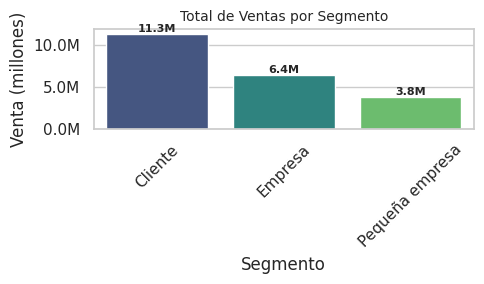

/tmp/ipython-input-641117841.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=ventas_por_categoría, x='Categoría', y='Venta', palette='viridis')


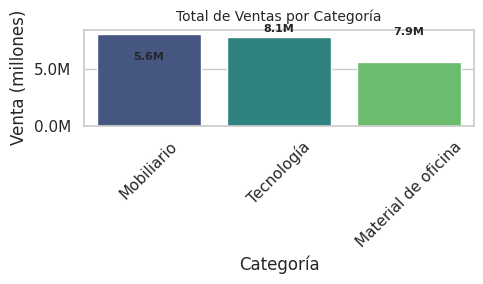

Total de ventas:  21568018
Ventas por Segmento
          Segmento     Venta
0          Cliente  11309620
1          Empresa   6427001
2  Pequeña empresa   3831397


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTXozjkuDg6tdEVyyVGZhzdCHwwLTWdl5T0jyc7acdwHZgPGpyYcPGbMvuLPmPqew/pub?gid=1933466057&single=true&output=csv')
df.head()
#df.info()

#Ventas por Segmento y Categorías


#-----------------------------------------

#ℹ️Solo para validación

Total_Venta= df['Venta'].sum()
pd.options.display.float_format = '${:,.0f}'.format

segmento = df.groupby('Segmento')['Venta'].sum()
segmento_df=segmento.reset_index()
segmento_df=segmento_df.sort_values(by='Venta', ascending=False)



#-----------------------------------------



ventas_por_segmento = df.groupby('Segmento')['Venta'].sum().reset_index()
ventas_por_segmento = ventas_por_segmento.sort_values(by='Venta', ascending=False)

sns.set(style="whitegrid")

plt.figure(figsize=(5, 3))
ax = sns.barplot(data=ventas_por_segmento, x='Segmento', y='Venta', palette='viridis')

for i, row in ventas_por_segmento.iterrows():
    ax.text(i, row['Venta'], f'{row["Venta"]/1_000_000:.1f}M',
            ha='center', va='bottom', fontsize=8, fontweight='bold')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M'))

plt.title("Total de Ventas por Segmento", fontsize=10)
plt.xlabel("Segmento")
plt.ylabel("Venta (millones)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



#--------------------------------------


ventas_por_categoría = df.groupby('Categoría')['Venta'].sum().reset_index()
ventas_por_categoría = ventas_por_categoría.sort_values(by='Venta', ascending=False)

sns.set(style="whitegrid")

plt.figure(figsize=(5, 3))
ax = sns.barplot(data=ventas_por_categoría, x='Categoría', y='Venta', palette='viridis')

for i, row in ventas_por_categoría.iterrows():
    ax.text(i, row['Venta'], f'{row["Venta"]/1_000_000:.1f}M',
            ha='center', va='bottom', fontsize=8, fontweight='bold')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M'))

plt.title("Total de Ventas por Categoría", fontsize=10)
plt.xlabel("Categoría")
plt.ylabel("Venta (millones)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#--------------------------------------




print('Total de ventas: ',Total_Venta)
print('Ventas por Segmento')
#print('Ventas por Segmento')
print(segmento_df)


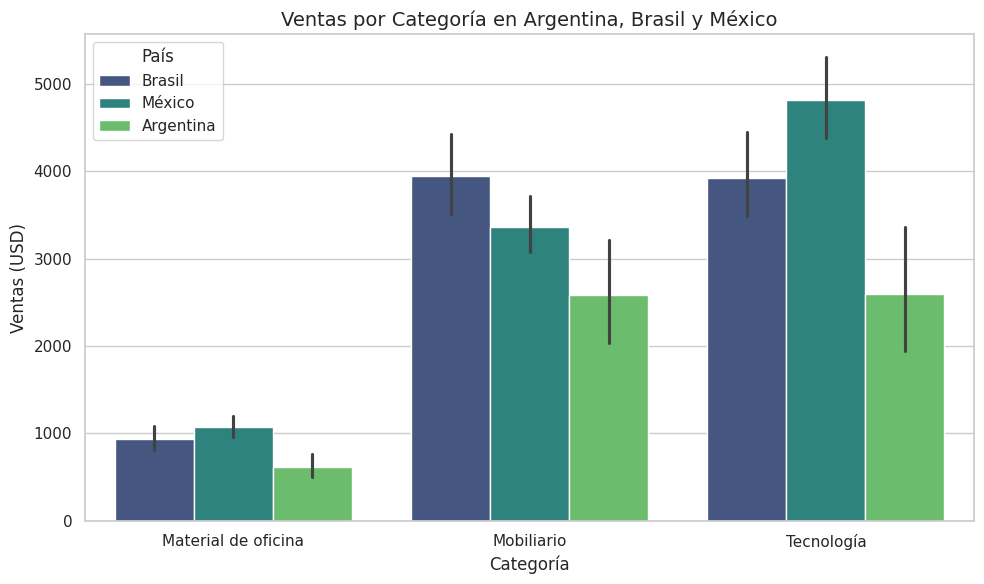

Ventas totales por categoría para Argentina, Brasil y México:
        País            Categoría    Venta
0  Argentina  Material de oficina   134707
1  Argentina           Mobiliario   235246
2  Argentina           Tecnología   205162
3     Brasil  Material de oficina   830865
4     Brasil           Mobiliario  1493612
5     Brasil           Tecnología  1284114
6     México  Material de oficina  1605750
7     México           Mobiliario  2157240
8     México           Tecnología  2461663


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTXozjkuDg6tdEVyyVGZhzdCHwwLTWdl5T0jyc7acdwHZgPGpyYcPGbMvuLPmPqew/pub?gid=1933466057&single=true&output=csv')
df.head()

# Comparativa simple para comenzar a comprobar hipotesis (sin mostrar variacion interanual)

paises_filtrados = ['Argentina', 'Brasil', 'México']
df_filtrado = df[df['País'].isin(paises_filtrados)]

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_filtrado, x='Categoría', y='Venta', hue='País', palette='viridis')

plt.title('Ventas por Categoría en Argentina, Brasil y México', fontsize=14)
plt.xlabel('Categoría')
plt.ylabel('Ventas (USD)')
plt.legend(title='País')

plt.tight_layout()
plt.show()

paises_filtrados = ['Argentina', 'Brasil', 'México']
df_filtrado = df[df['País'].isin(paises_filtrados)]

resumen_ventas = df_filtrado.groupby(['País', 'Categoría'])['Venta'].sum().reset_index()

print("Ventas totales por categoría para Argentina, Brasil y México:")
print(resumen_ventas)



/tmp/ipython-input-2962079695.py:25: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  grafico = sns.lineplot(data=df_filtrado_tec, x='Año', y='Venta', hue='País', marker='o', palette=palette)


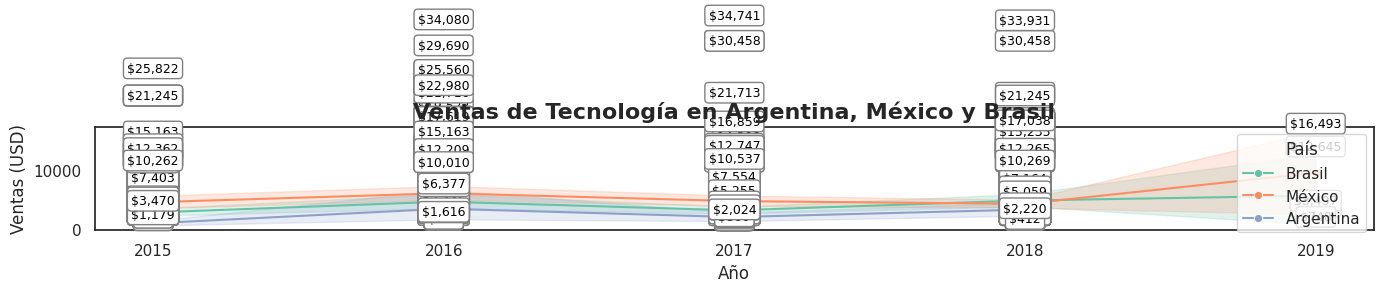

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTXozjkuDg6tdEVyyVGZhzdCHwwLTWdl5T0jyc7acdwHZgPGpyYcPGbMvuLPmPqew/pub?gid=1933466057&single=true&output=csv')
df.head()

### Se sigue trabajando en el formato y las etiquetas

paises_filtrados = ['Argentina', 'Brasil', 'México']
categoria_filtrada = ['Tecnología']


df_filtrado = df[df['País'].isin(paises_filtrados)]
df_filtrado_tec = df_filtrado[df_filtrado['Categoría'].isin(categoria_filtrada)]


sns.set(style="white")
palette = sns.color_palette("Set2")


plt.figure(figsize=(14,10))
grafico = sns.lineplot(data=df_filtrado_tec, x='Año', y='Venta', hue='País', marker='o', palette=palette)


grafico.set_title('Ventas de Tecnología en Argentina, México y Brasil', fontsize=16, weight='bold')
grafico.set_xlabel('Año', fontsize=12)
grafico.set_ylabel('Ventas (USD)', fontsize=12)
plt.xticks(sorted(df_filtrado_tec['Año'].unique()))


for i in range(len(df_filtrado_tec)):
    x = df_filtrado_tec.iloc[i]['Año']
    y = df_filtrado_tec.iloc[i]['Venta'].sum()
    label = f"${y:,.0f}"
    plt.text(x, y + max(df_filtrado_tec['Venta']) * 0.02, label, ha='center', fontsize=9, color='black', bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.3'))


plt.tight_layout()
plt.show()





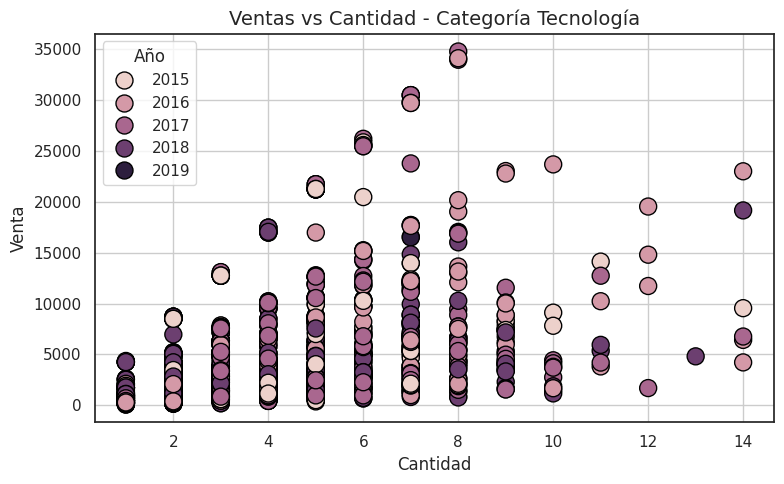

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTXozjkuDg6tdEVyyVGZhzdCHwwLTWdl5T0jyc7acdwHZgPGpyYcPGbMvuLPmPqew/pub?gid=1933466057&single=true&output=csv')
df.head()


#Dispersion aplicada solo a categoría Tecnología para evaluar la relacion entre las cantidades vendidas y los totales de ventas

df_tecnologia = df[df['Categoría'] == 'Tecnología']

# Gráfico de dispersión
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_tecnologia, x='Cantidad', y='Venta', hue='Año', color='blue', s=150, edgecolor='black')

# Títulos y etiquetas
plt.title('Ventas vs Cantidad - Categoría Tecnología', fontsize=14)
plt.xlabel('Cantidad', fontsize=12)
plt.ylabel('Venta', fontsize=12)
plt.grid(True)
plt.tight_layout()

# Mostrar gráfico
plt.show()






/tmp/ipython-input-3286877240.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Año'] = df_filtrado['Año'].astype(int)


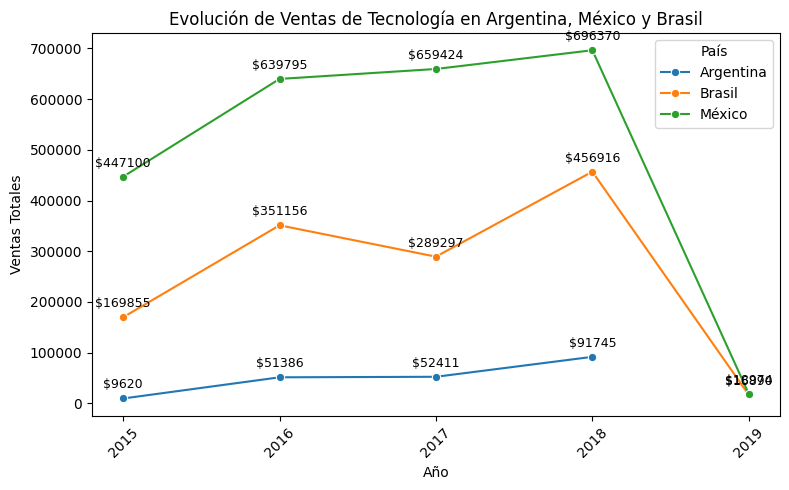

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTXozjkuDg6tdEVyyVGZhzdCHwwLTWdl5T0jyc7acdwHZgPGpyYcPGbMvuLPmPqew/pub?gid=1933466057&single=true&output=csv')
df.head()


paises_filtrados = ['Argentina', 'México', 'Brasil']
df_filtrado = df[(df['Categoría'] == 'Tecnología') & (df['País'].isin(paises_filtrados))]
df_filtrado['Año'] = df_filtrado['Año'].astype(int)
ventas_por_año_pais = df_filtrado.groupby(['Año', 'País'])['Venta'].sum().reset_index()


plt.figure(figsize=(8, 5))
ax = sns.lineplot(data=ventas_por_año_pais, x='Año', y='Venta', hue='País', marker='o')
plt.title('Evolución de Ventas de Tecnología en Argentina, México y Brasil')
plt.xlabel('Año')
plt.ylabel('Ventas Totales')

años = ventas_por_año_pais['Año'].unique()
plt.xticks(ticks=años, labels=[str(a) for a in años], rotation=45)

for i in range(len(ventas_por_año_pais)):
    x = ventas_por_año_pais.loc[i, 'Año']
    y = ventas_por_año_pais.loc[i, 'Venta']
    pais = ventas_por_año_pais.loc[i, 'País']
    ax.text(x, y + max(ventas_por_año_pais['Venta']) * 0.02, f'${y:.0f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()